In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Housing.csv')
Y=df['price']
X=df.drop(['price'],axis=1)
print(X)
print(Y)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['mainroad']=le.fit_transform(X['mainroad'])
X['guestroom']=le.fit_transform(X['guestroom'])
X['basement']=le.fit_transform(X['basement'])
X['hotwaterheating']=le.fit_transform(X['hotwaterheating'])
X['airconditioning']=le.fit_transform(X['airconditioning'])
X['prefarea']=le.fit_transform(X['prefarea'])
X['furnishingstatus']=le.fit_transform(X['furnishingstatus'])

print(X)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [5]:
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=0.25,random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [7]:
y_pred=regressor.predict(X_test)
y_pred

array([5258901.38185144, 7235978.26767804, 3074804.23583165,
       4529833.40768993, 3334896.01433317, 3582738.80172692,
       5714243.9760778 , 6467048.23130885, 2835600.38875236,
       2660849.63108369, 9630459.37389798, 2842313.73261652,
       3185820.22397591, 3337108.41428338, 3710547.88871678,
       5378935.52640573, 2971407.75080161, 4822100.37745742,
       4420946.55161184, 3544903.37307763, 5727172.69682827,
       5883080.54651171, 2773957.48051698, 4829182.2944597 ,
       5336729.04157344, 7626687.64636574, 3313472.54946864,
       5289712.58575654, 8251940.93695112, 3418321.02376056,
       6444901.46074548, 3364669.02442553, 6760319.30470108,
       4150512.06584206, 3574340.45808844, 5818971.63009337,
       4870818.06284826, 4359955.31593047, 3200469.78833818,
       4637248.74391467, 4610986.65539388, 3536073.83412229,
       7216790.54779044, 4037836.79163614, 3724788.24702379,
       4336414.93399043, 6667050.22679661, 4008515.20067887,
       3829521.92083308,

In [8]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,y_pred))

0.6614628548582817


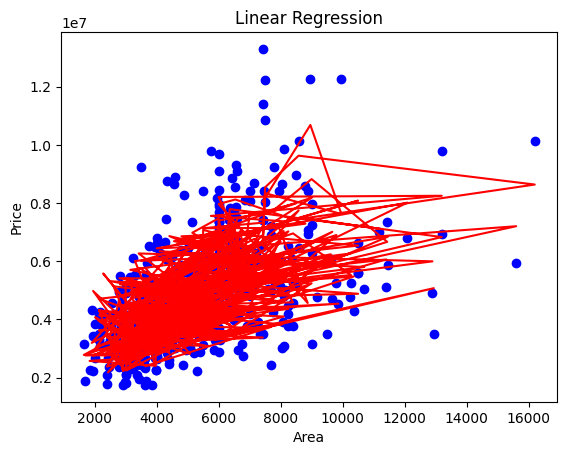

In [9]:
plt.scatter(X['area'],Y,color='blue')
plt.plot(X['area'],regressor.predict(X),color='red')
plt.title('Linear Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()